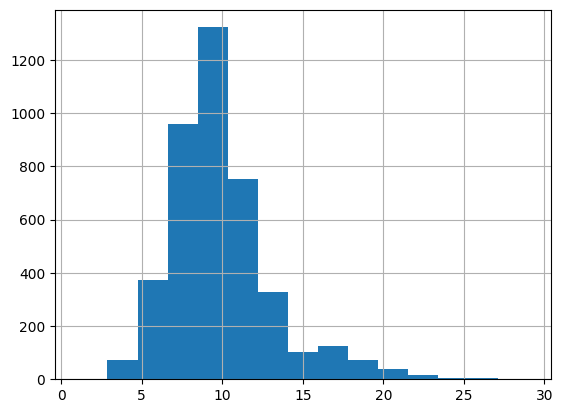

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)

abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone = abalone.drop("Sex", axis=1)
abalone["Rings"].hist(bins=15)

plt.show()
abalone.head()

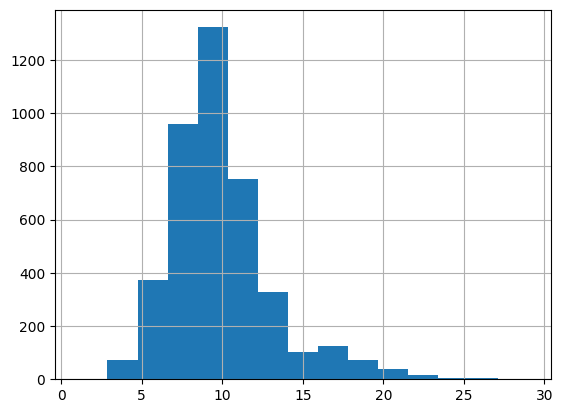

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

url = (
    "./abalone.data"
)
abalone = pd.read_csv(url, header=None)

abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone = abalone.drop("Sex", axis=1)
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]
abalone["Rings"].hist(bins=15)

plt.show()
abalone.head()

train preds: 1.6538366794859511
test preds: 2.375417924000521
train preds after tuned: 0.0
test preds after tuned: 2.1634265584947485


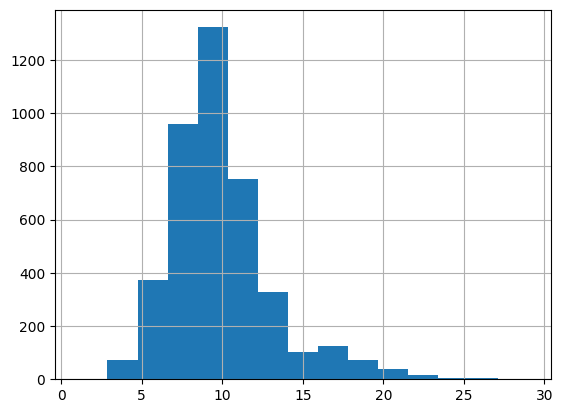

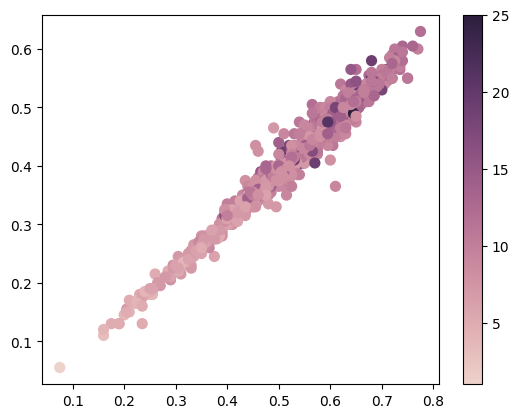

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

url = (
    "./abalone.data"
)
abalone = pd.read_csv(url, header=None)

abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone = abalone.drop("Sex", axis=1)
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]
abalone["Rings"].hist(bins=15)

X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

# KNN Model paired with a n_neigobors with my own value
knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train, y_train)
# train preds
train_preds = knn_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print("train preds: " + str(rmse_train))
# test preds
test_preds = knn_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_test)
print("test preds: " + str(rmse_test))

# draw scatter plot by using either test_preds or y_test
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()

'''
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
'''
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)

f.colorbar(points)

# Tune and Optimize KNN by using gridsearch
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
# new preds, mse & rmse after tuning
train_preds_grid = gridsearch.predict(X_train) # train
mse_train_tuned = mean_squared_error(y_train, train_preds_grid)
rmse_train_tuned = sqrt(mse_train_tuned)
test_preds_grid = gridsearch.predict(X_test) # test
mse_test_tuned = mean_squared_error(y_test, test_preds_grid)
rmse_test_tuned = sqrt(mse_test_tuned)

# tuning with Bagging
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k, weights=best_weights
)
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

'''
test_preds_grid = bagging_model.predict(X_test) # test
mse_test_tuned = mean_squared_error(y_test, test_preds_grid)
rmse_test_tuned = sqrt(mse_test_tuned)
'''
print("train preds after tuned: " + str(rmse_train_tuned))
print("test preds after tuned: " + str(rmse_test_tuned))

plt.show()